# 波士頓房價資料集 迴歸樹分析
目的:利用迴歸樹預測波士頓房價
<br>流程: 匯入資料>資料整理>切割資料集>配適模型>預測>判斷模型好壞

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

In [2]:
boston = load_boston()

## 一、資料格式
'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],........,[4.7410e-02, 0.0000e+00.....]])
         
'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, ..........., 20.6, 23.9, 22. , 11.9])
        
'feature_names': array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
df['target']=boston['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 二、變數名稱
<br> CRIM:    城鎮人均犯罪率 
<br> ZN:      住宅用地超過 2.5平方英尺的比例
<br> INDUS:   城鎮非零售商用土地的比例
<br> CHAS:    查理斯河虛擬變量（如果邊界是河流，則爲1；否則爲0）
<br> NOX:     一氧化氮濃度
<br> RM:      住宅平均房間數
<br> AGE:     1940 年之前建成的自用房屋比例
<br> DIS:     到波士頓五個中心區域的加權距離
<br> RAD:     輻射性公路的接近指數
<br> TAX:     每 10000 美元的全值財產稅率
<br> PTRATIO: 城鎮師生比例
<br> B:       城鎮中黑人的比例
<br> LSTAT:   人口中地位低下者的比例
<br> MEDV:    自住房的平均房價，以千美元計

## 三、切割資料集
      
  程式碼: train_test_split(data, random_state=777, train_size=p)
  * 原始的資料：就如同上方的 data 一般，是我們打算切成 Training data 以及 Test data 的原始資料 
  * Seed： 亂數種子，可以固定我們切割資料的結果
  * 比例：可以設定 train_size 或 test_size，只要設定一邊即可，範圍在 [0-1] 之間

In [4]:
from sklearn.model_selection import train_test_split
# 90%測試 10%驗證
x_train,x_test,y_train,y_test=train_test_split(boston['data'],
                                               boston['target'],
                                               test_size=0.1)

## 四、配適模型
* [DecisionTreeRegressor 回歸樹程式](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
* [DecisionTreeRegressor 演算法](https://www.itread01.com/content/1546598546.html)

In [13]:
# fit model
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=6)
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

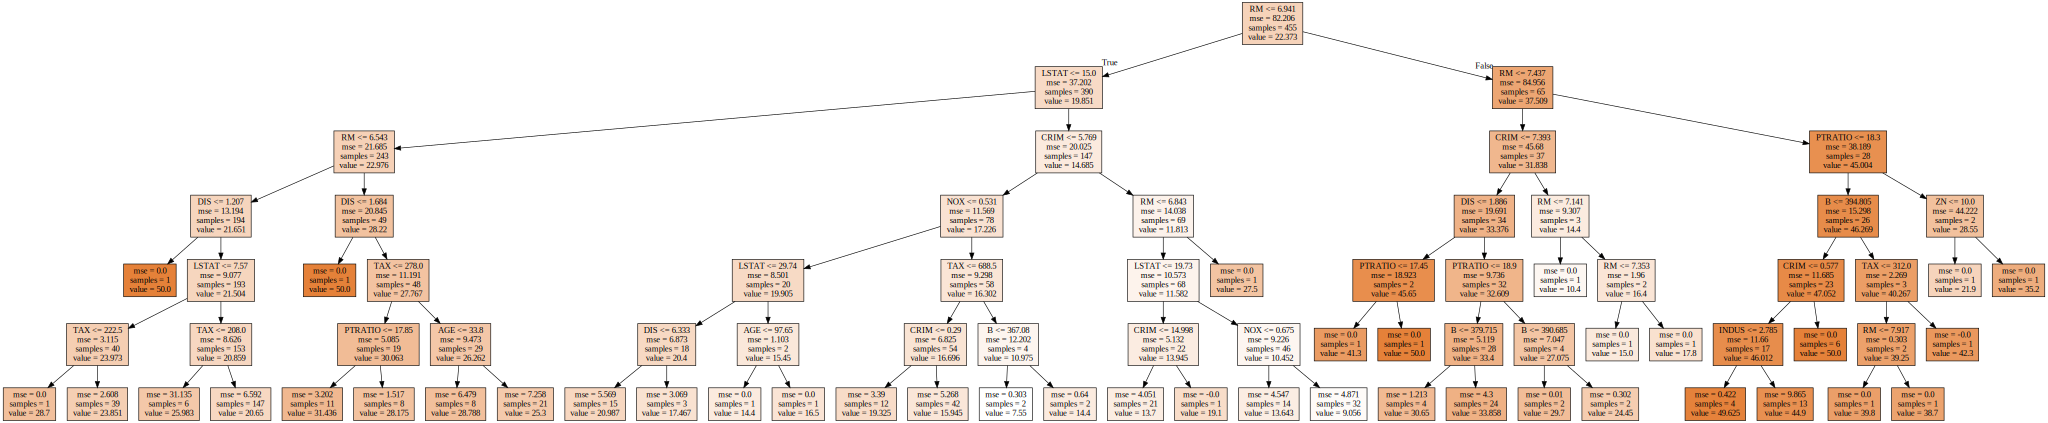

In [14]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg,out_file=None,
                   feature_names=boston['feature_names'],
                   filled=True)
graphviz.Source(g)

## 預測&驗證模型好壞
* [r2_score程式](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
* [r2_score公式](https://aijishu.com/a/1060000000079690)

r2_score 簡介
<br>f * :所有測試資料的平均
<br>fi:第i筆測試資料(Real)
<br>pi:第i筆預測資料(Predict)
<br>mse=(fi-f *) * * 2 : 為測試資料與均值的距離平方
<br>sse=(fi-pi) * * 2 : 實際值與預測值的距離平方

<br>sse/mse 為0則表示預測值等於實際值，為1則表示預測值都等於平均
<br> r2_score = 1-sse/mse
  

In [16]:
#print('預測結果',list(reg.predict(x_test)))
#print('正確結果',list(y_test))
from sklearn.metrics import r2_score
print('r2_score:',r2_score(y_test,reg.predict(x_test)))

r2_score: 0.9355964424895665
